# Top NYC Schools Analysis

New York City has many schools in the entirety of the district, some good, some bad. In this analysis, the aim is to find out the top schools in NYC, the average SAT scores, race distribution, male to female ratio, etc. Analysis will be done on the correlation between each variables and how each come into play when describing school performance.

The data has been sourced from: https://data.world/dataquest/nyc-schools-data.
The data contains information on most if not all New York City recognized schools.

In [61]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder 

# Importing the Data / Displaying Data

Importing the data from the CSV file, then displaying the data.

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
edu = pd.read_csv('/Users/ice50l/Downloads/nycSchools.csv')
edu.head()

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0,2.5,NaN,NaN,NaN,NaN,23.0,88.6,422.0,22.3,24.9,35.0,14.0,29.1,53.8,1.7,61.4,38.6,78.0,55.1,14.1,Manhattan,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0,1149.0,19.0,21.0,NaN,1.105263,NaN,21.0,71.8,598.0,5.0,26.4,19.0,9.7,23.9,55.4,10.4,54.7,45.3,90.0,77.8,5.6,Manhattan,40.729783,-73.983041
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414.0,401.0,359.0,1174.0,2.5,NaN,NaN,NaN,NaN,23.0,72.8,224.0,4.0,8.9,0.0,2.2,34.4,59.4,3.6,43.3,56.7,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0,1207.0,2.5,NaN,NaN,NaN,NaN,24.0,80.7,367.0,11.2,25.9,36.0,9.3,31.6,56.9,1.6,46.3,53.7,84.0,56.0,6.0,Manhattan,40.720569,-73.985673


# Data Cleaning / Statistics

Cleaning data by removing NA values and making sure the data is usable and ready to be analyzed. Showing the datatype values of each column as well as viewing the statistics of each column.

In [63]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   479 non-null    object 
 1   school_name                           479 non-null    object 
 2   Num of SAT Test Takers                422 non-null    float64
 3   SAT Critical Reading Avg. Score       422 non-null    float64
 4   SAT Math Avg. Score                   422 non-null    float64
 5   SAT Writing Avg. Score                422 non-null    float64
 6   avg_sat_score                         422 non-null    float64
 7   AP Test Takers                        479 non-null    float64
 8   Total Exams Taken                     232 non-null    float64
 9   Number of Exams with scores 3 4 or 5  151 non-null    float64
 10  exams_per_student                     232 non-null    float64
 11  high_score_percent 

In [64]:
edu.isna().sum()

DBN                                       0
school_name                               0
Num of SAT Test Takers                   57
SAT Critical Reading Avg. Score          57
SAT Math Avg. Score                      57
SAT Writing Avg. Score                   57
avg_sat_score                            57
AP Test Takers                            0
Total Exams Taken                       247
Number of Exams with scores 3 4 or 5    328
exams_per_student                       247
high_score_percent                      328
avg_class_size                           44
frl_percent                              41
total_enrollment                         41
ell_percent                              41
sped_percent                             41
selfcontained_num                        51
asian_per                                41
black_per                                41
hispanic_per                             41
white_per                                41
male_per                        

In [65]:
educ = edu.copy()

In [66]:
educ.fillna(0).head()

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0,2.5,0.0,0.0,0.000000,0.000000,23.0,88.6,422.0,22.3,24.9,35.0,14.0,29.1,53.8,1.7,61.4,38.6,78.0,55.1,14.1,Manhattan,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0,1149.0,19.0,21.0,0.0,1.105263,0.000000,21.0,71.8,598.0,5.0,26.4,19.0,9.7,23.9,55.4,10.4,54.7,45.3,90.0,77.8,5.6,Manhattan,40.729783,-73.983041
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,414.0,401.0,359.0,1174.0,2.5,0.0,0.0,0.000000,0.000000,23.0,72.8,224.0,4.0,8.9,0.0,2.2,34.4,59.4,3.6,43.3,56.7,0.0,0.0,0.0,0,0.000000,0.000000
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0,1207.0,2.5,0.0,0.0,0.000000,0.000000,24.0,80.7,367.0,11.2,25.9,36.0,9.3,31.6,56.9,1.6,46.3,53.7,84.0,56.0,6.0,Manhattan,40.720569,-73.985673


In [67]:
educ.dropna()

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.0,522.0,574.0,525.0,1621.0,255.0,377.0,191.0,1.478431,50.663130,26.0,23.0,1613.0,0.2,2.7,0.0,27.8,11.7,14.2,44.9,49.2,50.8,46.0,100.0,0.0,Manhattan,40.718725,-73.979426
14,02M300,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,48.0,404.0,449.0,416.0,1269.0,99.0,117.0,10.0,1.181818,8.547009,23.0,75.3,431.0,10.9,20.0,12.0,6.0,29.2,59.2,4.9,74.9,25.1,80.0,61.3,8.8,Manhattan,40.765027,-73.992517
16,02M305,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",50.0,375.0,388.0,385.0,1148.0,25.0,37.0,15.0,1.480000,40.540541,21.0,68.3,312.0,6.1,17.0,5.0,3.8,41.7,50.6,3.5,43.9,56.1,61.0,75.4,16.4,Manhattan,40.716867,-73.989532
26,02M400,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,263.0,465.0,493.0,461.0,1419.0,213.0,298.0,152.0,1.399061,51.006711,31.0,56.4,1394.0,7.1,14.4,47.0,16.7,14.8,57.2,11.1,50.4,49.6,352.0,74.4,6.3,Manhattan,40.767762,-73.987511
28,02M408,PROFESSIONAL PERFORMING ARTS HIGH SCHOOL,94.0,509.0,490.0,523.0,1522.0,20.0,20.0,15.0,1.000000,75.000000,29.0,23.5,502.0,2.0,3.2,0.0,7.0,19.1,23.7,41.8,25.3,74.7,80.0,92.5,0.0,Manhattan,40.761433,-73.988024
29,02M411,BARUCH COLLEGE CAMPUS HIGH SCHOOL,104.0,496.0,563.0,518.0,1577.0,78.0,115.0,88.0,1.474359,76.521739,27.0,54.6,432.0,1.6,2.3,0.0,60.6,5.8,14.6,18.8,44.0,56.0,105.0,98.1,0.0,Manhattan,40.744047,-73.991479
30,02M412,N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES,114.0,537.0,590.0,550.0,1677.0,114.0,140.0,97.0,1.228070,69.285714,33.0,21.6,579.0,1.6,15.0,0.0,29.4,8.5,14.0,45.9,47.0,53.0,124.0,91.1,1.6,Manhattan,40.742101,-74.002074
33,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127.0,572.0,594.0,592.0,1758.0,155.0,235.0,169.0,1.516129,71.914894,27.0,15.8,507.0,0.2,1.2,0.0,17.2,5.5,11.6,63.7,32.5,67.5,127.0,100.0,0.0,Manhattan,40.770116,-73.953379
34,02M418,MILLENNIUM HIGH SCHOOL,144.0,528.0,553.0,533.0,1614.0,86.0,95.0,67.0,1.104651,70.526316,29.0,32.7,626.0,0.2,9.1,0.0,30.0,8.8,21.7,35.9,38.2,61.8,150.0,96.7,0.0,Manhattan,40.704920,-74.011514


In [68]:
#Checking Statistics
educ.describe()

,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,lat,long
count,422.000000,422.000000,422.000000,422.000000,422.000000,479.000000,232.000000,151.000000,232.000000,151.000000,435.00000,438.000000,438.000000,438.000000,438.000000,428.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,390.000000,368.000000,368.000000,370.000000,370.000000
mean,110.225118,400.924171,413.445498,394.113744,1208.483412,59.092902,181.250000,143.615894,1.323432,41.199578,24.34023,66.441553,720.591324,13.057078,14.259589,30.794393,9.331963,38.475571,43.643607,7.734703,49.405708,50.593379,186.074359,63.299457,9.924185,40.743461,-73.924970
std,155.361823,56.755541,64.627312,58.624424,174.422994,165.079780,391.172284,373.153407,0.279552,22.753374,3.70317,16.066729,813.965832,19.640289,7.289985,50.027859,14.246250,25.943605,24.505006,13.325643,13.813514,13.812954,226.125320,21.466979,7.288873,0.081451,0.071582
min,6.000000,279.000000,312.000000,286.000000,887.000000,2.500000,6.000000,6.000000,1.000000,4.385965,10.00000,15.800000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.528229,-74.192154
25%,41.000000,368.000000,371.250000,360.000000,1102.000000,2.500000,30.000000,14.000000,1.070238,24.681298,22.00000,59.025000,353.250000,2.725000,10.025000,2.000000,1.100000,19.725000,20.425000,0.900000,44.025000,45.100000,75.000000,51.900000,3.800000,40.686660,-73.979256
50%,62.000000,391.000000,395.000000,381.500000,1169.500000,2.500000,65.500000,37.000000,1.299958,38.679245,24.00000,69.700000,449.000000,6.850000,14.800000,13.500000,3.200000,32.450000,45.650000,1.850000,49.800000,50.200000,100.000000,64.450000,8.800000,40.740847,-73.929116
75%,95.000000,416.750000,437.000000,411.000000,1257.750000,45.500000,151.000000,106.000000,1.500519,55.571721,27.00000,77.000000,625.000000,13.975000,19.375000,35.000000,9.175000,55.950000,63.225000,6.975000,54.900000,55.975000,160.500000,77.800000,15.200000,40.818303,-73.888617
max,1277.000000,679.000000,735.000000,682.000000,2096.000000,2117.000000,3692.000000,2687.000000,2.448276,100.000000,37.00000,100.000000,5332.000000,94.900000,34.300000,352.000000,89.500000,95.700000,100.000000,82.100000,100.000000,100.000000,1209.000000,100.000000,40.600000,40.888373,-73.726910


# Exploratory Analysis/Visualizations

Exploring the data in depth, to view correlations, relationships, etc. Using the data to create simple visualizations for everyday non-data people to understand.

In [69]:
topSAT = educ.sort_values(by=['avg_sat_score'], ascending = False).head(10)
topSAT

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
48,02M475,STUYVESANT HIGH SCHOOL,832.0,679.0,735.0,682.0,2096.0,1510.0,2819.0,2648.0,1.866887,93.934019,31.0,30.3,3297.0,0.0,0.4,0.0,72.1,1.2,2.4,23.7,59.3,40.7,787.0,98.3,0.4,Manhattan,40.717746,-74.014049
199,10X445,BRONX HIGH SCHOOL OF SCIENCE,731.0,632.0,688.0,649.0,1969.0,1190.0,2435.0,2189.0,2.046218,89.897331,31.0,34.2,3013.0,0.1,0.1,0.0,63.5,3.5,7.2,25.4,57.8,42.2,668.0,98.4,0.0,Bronx,40.877056,-73.889780
460,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227.0,635.0,682.0,636.0,1953.0,528.0,905.0,809.0,1.714015,89.392265,30.0,17.0,1104.0,0.1,0.5,0.0,31.8,1.1,5.3,61.3,57.0,43.0,288.0,99.7,0.0,Staten Island,40.567913,-74.115362
207,10X696,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,92.0,636.0,648.0,636.0,1920.0,194.0,302.0,243.0,1.556701,80.463576,22.0,20.8,377.0,0.0,1.3,0.0,16.7,10.6,18.0,53.8,53.8,46.2,78.0,97.4,1.3,Bronx,40.871255,-73.897516
397,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278.0,621.0,651.0,638.0,1910.0,613.0,796.0,625.0,1.298532,78.517588,29.0,29.2,1140.0,0.0,0.2,0.0,55.5,5.9,12.9,24.6,28.9,71.1,278.0,100.0,0.0,Queens,40.734408,-73.821417
428,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,121.0,612.0,660.0,596.0,1868.0,215.0,338.0,275.0,1.572093,81.360947,26.0,25.6,418.0,0.2,0.2,0.0,74.4,10.5,7.9,6.7,56.5,43.5,107.0,95.3,0.0,Queens,40.700999,-73.798154
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130.0,624.0,604.0,628.0,1856.0,2.5,NaN,NaN,NaN,NaN,21.0,18.0,617.0,0.2,0.8,0.0,15.1,15.1,18.2,49.8,31.3,68.7,139.0,96.4,0.7,Manhattan,40.718962,-73.976066
108,05M692,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",101.0,605.0,654.0,588.0,1847.0,114.0,124.0,71.0,1.087719,57.258065,22.0,18.5,406.0,0.0,0.0,NaN,36.2,15.0,21.2,26.1,65.8,34.2,106.0,95.3,0.0,Manhattan,40.821123,-73.948845
250,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277.0,587.0,659.0,587.0,1833.0,2117.0,3692.0,2687.0,1.743977,72.778982,32.0,50.7,5332.0,0.1,0.5,0.0,60.3,10.2,7.9,21.3,58.3,41.7,1097.0,91.4,0.2,Brooklyn,40.688107,-73.976745
33,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127.0,572.0,594.0,592.0,1758.0,155.0,235.0,169.0,1.516129,71.914894,27.0,15.8,507.0,0.2,1.2,0.0,17.2,5.5,11.6,63.7,32.5,67.5,127.0,100.0,0.0,Manhattan,40.770116,-73.953379


In [70]:
# Here are the top 10 schools that have the highest average SAT scores in NYC. 

In [71]:
fig = px.bar(topSAT, 
             x = 'school_name', 
             y = ['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score'], 
             title = 'Top 10 Schools Average SAT scores', 
             width = 1100, 
             height = 900)
fig.show()

In [72]:
# Top 10 schools average male percentage
top10male = topSAT['male_per'].sum()
top10male = top10male/10
top10male

50.12

In [73]:
# Top 10 schools average female percentage
top10f = topSAT['female_per'].sum()
top10f = top10f/10
top10f

49.88

In [74]:
topSAT = topSAT.set_index('school_name')

In [75]:
average = topSAT.mean()
average.name = 'average'
topSAT = topSAT.append(average)
topSAT

/var/folders/d3/dr_pdhzd2ddc86631bdyzqt00000gn/T/ipykernel_2946/2590175839.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,DBN,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
school_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
STUYVESANT HIGH SCHOOL,02M475,832.0,679.0,735.0,682.0,2096.0,1510.00,2819.0,2648.000000,1.866887,93.934019,31.0,30.30,3297.0,0.00,0.40,0.0,72.10,1.20,2.40,23.70,59.30,40.70,787.0,98.30,0.40,Manhattan,40.717746,-74.014049
BRONX HIGH SCHOOL OF SCIENCE,10X445,731.0,632.0,688.0,649.0,1969.0,1190.00,2435.0,2189.000000,2.046218,89.897331,31.0,34.20,3013.0,0.10,0.10,0.0,63.50,3.50,7.20,25.40,57.80,42.20,668.0,98.40,0.00,Bronx,40.877056,-73.889780
STATEN ISLAND TECHNICAL HIGH SCHOOL,31R605,227.0,635.0,682.0,636.0,1953.0,528.00,905.0,809.000000,1.714015,89.392265,30.0,17.00,1104.0,0.10,0.50,0.0,31.80,1.10,5.30,61.30,57.00,43.00,288.0,99.70,0.00,Staten Island,40.567913,-74.115362
HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,10X696,92.0,636.0,648.0,636.0,1920.0,194.00,302.0,243.000000,1.556701,80.463576,22.0,20.80,377.0,0.00,1.30,0.0,16.70,10.60,18.00,53.80,53.80,46.20,78.0,97.40,1.30,Bronx,40.871255,-73.897516
TOWNSEND HARRIS HIGH SCHOOL,25Q525,278.0,621.0,651.0,638.0,1910.0,613.00,796.0,625.000000,1.298532,78.517588,29.0,29.20,1140.0,0.00,0.20,0.0,55.50,5.90,12.90,24.60,28.90,71.10,278.0,100.00,0.00,Queens,40.734408,-73.821417
QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE,28Q687,121.0,612.0,660.0,596.0,1868.0,215.00,338.0,275.000000,1.572093,81.360947,26.0,25.60,418.0,0.20,0.20,0.0,74.40,10.50,7.90,6.70,56.50,43.50,107.0,95.30,0.00,Queens,40.700999,-73.798154
BARD HIGH SCHOOL EARLY COLLEGE,01M696,130.0,624.0,604.0,628.0,1856.0,2.50,NaN,NaN,NaN,NaN,21.0,18.00,617.0,0.20,0.80,0.0,15.10,15.10,18.20,49.80,31.30,68.70,139.0,96.40,0.70,Manhattan,40.718962,-73.976066
"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGINEERING AT CITY COLLEGE",05M692,101.0,605.0,654.0,588.0,1847.0,114.00,124.0,71.000000,1.087719,57.258065,22.0,18.50,406.0,0.00,0.00,NaN,36.20,15.00,21.20,26.10,65.80,34.20,106.0,95.30,0.00,Manhattan,40.821123,-73.948845
BROOKLYN TECHNICAL HIGH SCHOOL,13K430,1277.0,587.0,659.0,587.0,1833.0,2117.00,3692.0,2687.000000,1.743977,72.778982,32.0,50.70,5332.0,0.10,0.50,0.0,60.30,10.20,7.90,21.30,58.30,41.70,1097.0,91.40,0.20,Brooklyn,40.688107,-73.976745


<AxesSubplot:title={'center':'Top 10 NYC schools gender distribution'}, xlabel='School Name', ylabel='Percentage'>

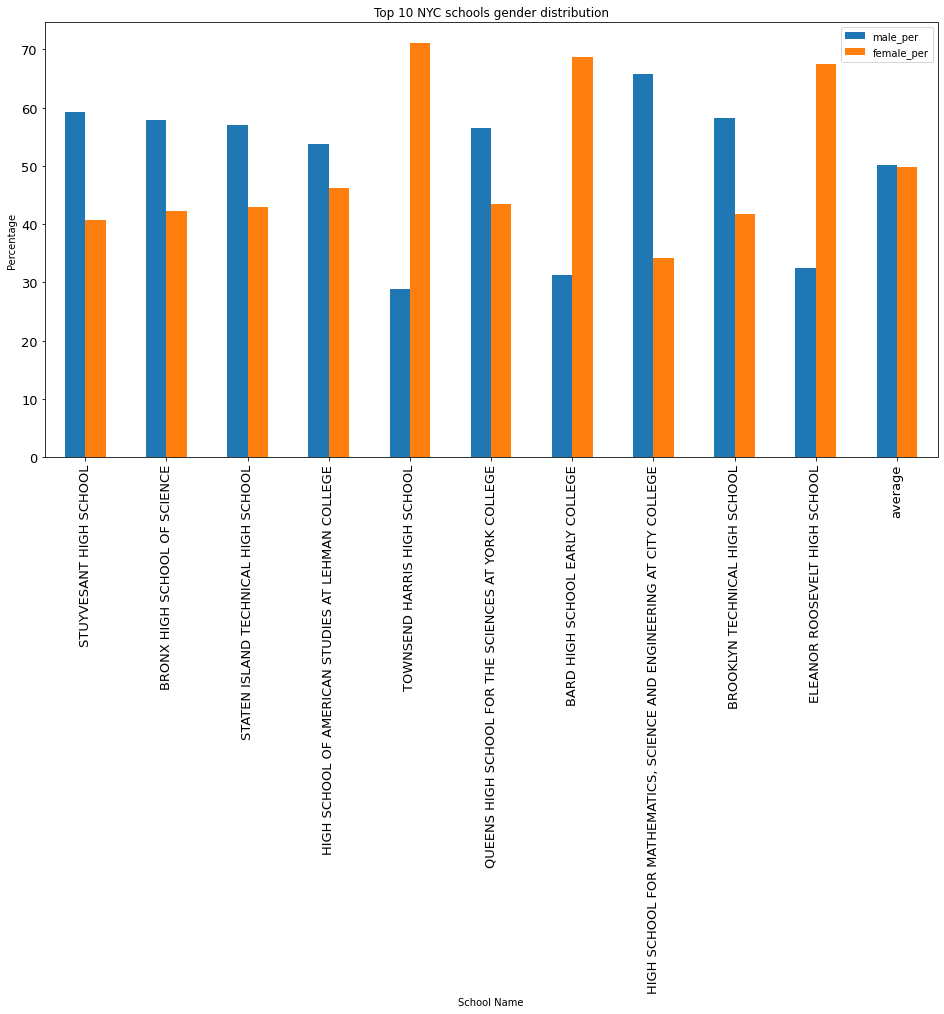

In [76]:
topSAT[['male_per','female_per']].plot(kind = 'bar', 
                                       figsize = (16,8), 
                                       title = 'Top 10 NYC schools gender distribution',
                                       xlabel = 'School Name',
                                       ylabel = 'Percentage',
                                       fontsize = 13
                                      )

In [77]:
# It appears that some schools have way more females than males (Townsend, Bard, Ellanor) while some schools have a 
# large amount of males compared to females as well (Queens, HS for math, Stuyversant), however the average for the 
# top 10 schools average to just more males than females in these schools slightly. 

<AxesSubplot:title={'center':'Top 10 NYC Schools Race Distribution'}, xlabel='School Name', ylabel='Percentage'>

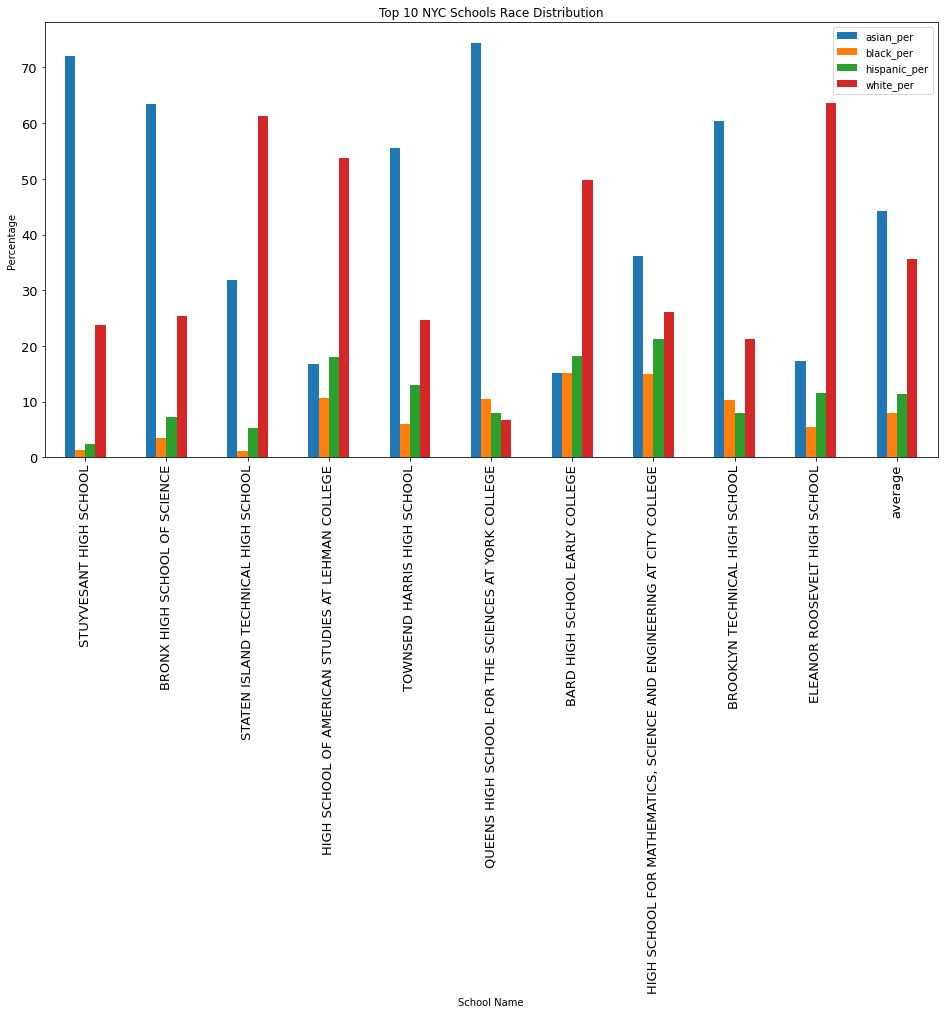

In [78]:
topSAT[['asian_per','black_per','hispanic_per', 'white_per']].plot(kind = 'bar', 
                                       figsize = (16,8), 
                                       title = 'Top 10 NYC Schools Race Distribution',
                                       xlabel = 'School Name',
                                       ylabel = 'Percentage',
                                       fontsize = 13
                                      )

In [79]:
# It appears that asian and white students have the highest presence in the top 10 schools compared to other races.

In [80]:
M_data = educ.loc[(educ['boro'] == "Manhattan")]
M_data

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,1122.0,2.5,NaN,NaN,NaN,NaN,23.0,88.6,422.0,22.3,24.9,35.0,14.0,29.1,53.8,1.7,61.4,38.6,78.0,55.1,14.1,Manhattan,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,377.0,402.0,370.0,1149.0,19.0,21.0,NaN,1.105263,NaN,21.0,71.8,598.0,5.0,26.4,19.0,9.7,23.9,55.4,10.4,54.7,45.3,90.0,77.8,5.6,Manhattan,40.729783,-73.983041
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,390.0,433.0,384.0,1207.0,2.5,NaN,NaN,NaN,NaN,24.0,80.7,367.0,11.2,25.9,36.0,9.3,31.6,56.9,1.6,46.3,53.7,84.0,56.0,6.0,Manhattan,40.720569,-73.985673
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159.0,522.0,574.0,525.0,1621.0,255.0,377.0,191.0,1.478431,50.663130,26.0,23.0,1613.0,0.2,2.7,0.0,27.8,11.7,14.2,44.9,49.2,50.8,46.0,100.0,0.0,Manhattan,40.718725,-73.979426
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130.0,624.0,604.0,628.0,1856.0,2.5,NaN,NaN,NaN,NaN,21.0,18.0,617.0,0.2,0.8,0.0,15.1,15.1,18.2,49.8,31.3,68.7,139.0,96.4,0.7,Manhattan,40.718962,-73.976066
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16.0,395.0,400.0,387.0,1182.0,2.5,NaN,NaN,NaN,NaN,16.0,66.9,174.0,8.0,32.2,10.0,1.7,32.2,59.2,6.3,42.5,57.5,25.0,76.0,4.0,Manhattan,40.738599,-73.982512
10,02M288,FOOD AND FINANCE HIGH SCHOOL,62.0,409.0,393.0,392.0,1194.0,2.5,NaN,NaN,NaN,NaN,23.0,68.4,433.0,2.1,18.5,4.0,3.0,44.1,47.6,4.8,45.0,55.0,102.0,89.2,2.9,Manhattan,40.765027,-73.992517
11,02M294,ESSEX STREET ACADEMY,53.0,394.0,384.0,378.0,1156.0,2.5,NaN,NaN,NaN,NaN,15.0,60.8,343.0,3.8,20.4,2.0,4.1,27.7,60.6,7.6,53.4,46.6,89.0,71.9,10.1,Manhattan,40.716867,-73.989532
12,02M296,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58.0,374.0,375.0,362.0,1111.0,2.5,NaN,NaN,NaN,NaN,23.0,72.4,419.0,9.5,14.8,17.0,5.3,26.5,66.1,2.1,32.2,67.8,75.0,77.3,6.7,Manhattan,40.765027,-73.992517


In [81]:
B_data = educ.loc[(educ['boro'] == "Bronx")]
B_data

,DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
120,07X221,SOUTH BRONX PREPARATORY: A COLLEGE BOARD SCHOOL,65.0,364.0,378.0,348.0,1090.0,63.0,89.0,24.0,1.412698,26.966292,21.0,72.9,622.0,8.8,19.3,21.0,0.6,29.9,68.8,0.5,47.4,52.6,80.0,80.0,3.8,Bronx,40.814011,-73.920837
122,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34.0,310.0,324.0,311.0,945.0,2.5,NaN,NaN,NaN,NaN,16.0,77.5,393.0,90.1,1.8,0.0,4.8,20.1,71.8,2.0,48.6,51.4,10.0,NaN,NaN,Bronx,40.810036,-73.917812
125,07X427,COMMUNITY SCHOOL FOR SOCIAL JUSTICE,43.0,361.0,359.0,357.0,1077.0,2.5,NaN,NaN,NaN,NaN,23.0,82.7,319.0,13.2,19.7,11.0,0.6,32.3,65.5,0.9,49.2,50.8,81.0,64.2,19.8,Bronx,40.816084,-73.930324
126,07X473,MOTT HAVEN VILLAGE PREPARATORY HIGH SCHOOL,63.0,351.0,375.0,371.0,1097.0,2.5,NaN,NaN,NaN,NaN,24.0,78.5,363.0,9.6,18.5,8.0,1.1,22.6,76.0,0.0,50.1,49.9,69.0,63.8,14.5,Bronx,40.818174,-73.911093
127,07X495,UNIVERSITY HEIGHTS SECONDARY SCHOOL,79.0,403.0,394.0,404.0,1201.0,2.5,NaN,NaN,NaN,NaN,27.0,90.1,465.0,3.7,5.2,0.0,2.6,18.1,78.1,1.3,43.2,56.8,NaN,NaN,NaN,Bronx,40.818174,-73.911093
128,07X500,HOSTOSsLINCOLN ACADEMY OF SCIENCE,66.0,420.0,426.0,411.0,1257.0,64.0,107.0,39.0,1.671875,36.448598,21.0,68.3,538.0,5.6,11.9,11.0,2.0,24.0,72.7,0.7,45.2,54.8,61.0,83.6,1.6,Bronx,40.814955,-73.912520
129,07X520,FOREIGN LANGUAGE ACADEMY OF GLOBAL STUDIES,64.0,399.0,396.0,391.0,1186.0,13.0,13.0,12.0,1.000000,92.307692,23.0,89.9,311.0,21.9,22.5,50.0,3.2,26.0,68.8,1.0,45.3,54.7,136.0,60.3,7.4,Bronx,40.811139,-73.909787
130,07X527,BRONX LEADERSHIP ACADEMY II HIGH SCHOOL,62.0,362.0,378.0,363.0,1103.0,30.0,30.0,NaN,1.000000,NaN,24.0,77.0,502.0,14.1,18.5,24.0,1.4,41.2,56.0,1.0,54.0,46.0,102.0,72.5,14.7,Bronx,40.822776,-73.923523
131,07X547,NEW EXPLORERS HIGH SCHOOL,28.0,367.0,356.0,361.0,1084.0,18.0,18.0,NaN,1.000000,NaN,24.0,90.4,383.0,15.7,25.1,17.0,0.5,30.3,68.1,0.5,57.7,42.3,81.0,44.4,17.3,Bronx,40.822776,-73.923523
132,07X548,URBAN ASSEMBLY SCHOOL FOR CAREERS IN SPORTS,44.0,387.0,411.0,383.0,1181.0,2.5,NaN,NaN,NaN,NaN,26.0,74.3,477.0,5.0,18.7,18.0,0.4,26.6,70.4,0.4,84.3,15.7,82.0,79.3,6.1,Bronx,40.822776,-73.923523


In [82]:
educ = educ.set_index('school_name')

In [83]:
data = educ.loc[(educ["boro"] == "Manhattan") | (educ["boro"] == "Bronx")]
data

,DBN,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
school_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,01M292,29.0,355.0,404.0,363.0,1122.0,2.5,NaN,NaN,NaN,NaN,23.0,88.6,422.0,22.3,24.9,35.0,14.0,29.1,53.8,1.7,61.4,38.6,78.0,55.1,14.1,Manhattan,40.713764,-73.985260
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,01M448,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
EAST SIDE COMMUNITY SCHOOL,01M450,70.0,377.0,402.0,370.0,1149.0,19.0,21.0,NaN,1.105263,NaN,21.0,71.8,598.0,5.0,26.4,19.0,9.7,23.9,55.4,10.4,54.7,45.3,90.0,77.8,5.6,Manhattan,40.729783,-73.983041
MARTA VALLE HIGH SCHOOL,01M509,44.0,390.0,433.0,384.0,1207.0,2.5,NaN,NaN,NaN,NaN,24.0,80.7,367.0,11.2,25.9,36.0,9.3,31.6,56.9,1.6,46.3,53.7,84.0,56.0,6.0,Manhattan,40.720569,-73.985673
"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",01M539,159.0,522.0,574.0,525.0,1621.0,255.0,377.0,191.0,1.478431,50.663130,26.0,23.0,1613.0,0.2,2.7,0.0,27.8,11.7,14.2,44.9,49.2,50.8,46.0,100.0,0.0,Manhattan,40.718725,-73.979426
BARD HIGH SCHOOL EARLY COLLEGE,01M696,130.0,624.0,604.0,628.0,1856.0,2.5,NaN,NaN,NaN,NaN,21.0,18.0,617.0,0.2,0.8,0.0,15.1,15.1,18.2,49.8,31.3,68.7,139.0,96.4,0.7,Manhattan,40.718962,-73.976066
47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECONDARY SCHOOL,02M047,16.0,395.0,400.0,387.0,1182.0,2.5,NaN,NaN,NaN,NaN,16.0,66.9,174.0,8.0,32.2,10.0,1.7,32.2,59.2,6.3,42.5,57.5,25.0,76.0,4.0,Manhattan,40.738599,-73.982512
FOOD AND FINANCE HIGH SCHOOL,02M288,62.0,409.0,393.0,392.0,1194.0,2.5,NaN,NaN,NaN,NaN,23.0,68.4,433.0,2.1,18.5,4.0,3.0,44.1,47.6,4.8,45.0,55.0,102.0,89.2,2.9,Manhattan,40.765027,-73.992517
ESSEX STREET ACADEMY,02M294,53.0,394.0,384.0,378.0,1156.0,2.5,NaN,NaN,NaN,NaN,15.0,60.8,343.0,3.8,20.4,2.0,4.1,27.7,60.6,7.6,53.4,46.6,89.0,71.9,10.1,Manhattan,40.716867,-73.989532


In [84]:
# Comparing the average math score of Manhattan and the Bronx.
px.box(data, x="boro", y = "SAT Math Avg. Score",points = "all", color="boro")

In [85]:
# Comparing the average critical reading score with Manhattan and the Bronx.
px.box(data, x="boro", y = "SAT Critical Reading Avg. Score",points = "all", color="boro")

In [86]:
# Comparing the average SAT score between Manhattan and the Bronx.
px.box(data, x="boro", y = "avg_sat_score",points = "all", color="boro")

In [87]:
data1 = educ.loc[(educ["boro"] != 'Staten Island')]
data1 = data1[data1['boro'].notna()]
data1

,DBN,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,exams_per_student,high_score_percent,avg_class_size,frl_percent,total_enrollment,ell_percent,sped_percent,selfcontained_num,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
school_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,01M292,29.0,355.0,404.0,363.0,1122.0,2.5,NaN,NaN,NaN,NaN,23.0,88.6,422.0,22.3,24.9,35.0,14.0,29.1,53.8,1.7,61.4,38.6,78.0,55.1,14.1,Manhattan,40.713764,-73.985260
UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,01M448,91.0,383.0,423.0,366.0,1172.0,39.0,49.0,10.0,1.256410,20.408163,22.0,71.8,394.0,21.1,21.8,10.0,29.2,22.6,45.9,2.3,57.4,42.6,124.0,42.7,16.1,Manhattan,40.712332,-73.984797
EAST SIDE COMMUNITY SCHOOL,01M450,70.0,377.0,402.0,370.0,1149.0,19.0,21.0,NaN,1.105263,NaN,21.0,71.8,598.0,5.0,26.4,19.0,9.7,23.9,55.4,10.4,54.7,45.3,90.0,77.8,5.6,Manhattan,40.729783,-73.983041
MARTA VALLE HIGH SCHOOL,01M509,44.0,390.0,433.0,384.0,1207.0,2.5,NaN,NaN,NaN,NaN,24.0,80.7,367.0,11.2,25.9,36.0,9.3,31.6,56.9,1.6,46.3,53.7,84.0,56.0,6.0,Manhattan,40.720569,-73.985673
"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL",01M539,159.0,522.0,574.0,525.0,1621.0,255.0,377.0,191.0,1.478431,50.663130,26.0,23.0,1613.0,0.2,2.7,0.0,27.8,11.7,14.2,44.9,49.2,50.8,46.0,100.0,0.0,Manhattan,40.718725,-73.979426
BARD HIGH SCHOOL EARLY COLLEGE,01M696,130.0,624.0,604.0,628.0,1856.0,2.5,NaN,NaN,NaN,NaN,21.0,18.0,617.0,0.2,0.8,0.0,15.1,15.1,18.2,49.8,31.3,68.7,139.0,96.4,0.7,Manhattan,40.718962,-73.976066
47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECONDARY SCHOOL,02M047,16.0,395.0,400.0,387.0,1182.0,2.5,NaN,NaN,NaN,NaN,16.0,66.9,174.0,8.0,32.2,10.0,1.7,32.2,59.2,6.3,42.5,57.5,25.0,76.0,4.0,Manhattan,40.738599,-73.982512
FOOD AND FINANCE HIGH SCHOOL,02M288,62.0,409.0,393.0,392.0,1194.0,2.5,NaN,NaN,NaN,NaN,23.0,68.4,433.0,2.1,18.5,4.0,3.0,44.1,47.6,4.8,45.0,55.0,102.0,89.2,2.9,Manhattan,40.765027,-73.992517
ESSEX STREET ACADEMY,02M294,53.0,394.0,384.0,378.0,1156.0,2.5,NaN,NaN,NaN,NaN,15.0,60.8,343.0,3.8,20.4,2.0,4.1,27.7,60.6,7.6,53.4,46.6,89.0,71.9,10.1,Manhattan,40.716867,-73.989532


In [88]:
# Final comparison based on every borough (Minus Staten Island due to small representation size) on average SAT score.
px.box(data1, x="boro", y = "avg_sat_score",points = "all", color="boro")

In [89]:
# A reasonable explanation of the SAT gap per borough can be linked to the funding and crime rate of that specific
# region. For an example, the Bronx is notoriously known as the most dangerous boroughs in New York City, as well as
# being one of the most underfunded. This contrasts Manhattan and Queens, which is mostly known to be in the safer
# side as well as being well funded by the government. 

In [90]:
# School borough representation
educc = educ.dropna()
px.pie(educc, 'boro')

In [91]:
# The representation of each borough is roughly the same, minus the addition of Staten Island consisting of only 
# about 5.22% of the entire school population of NYC. 

In [92]:
px.violin(educc, x = 'boro', y = 'avg_sat_score', color = 'boro', box = True, points = 'all')

In [93]:
fig = px.scatter_mapbox(educc, 
                  lat = 'lat', 
                  lon = 'long',
                 color = 'boro',
                 size = 'Num of SAT Test Takers')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

<AxesSubplot:xlabel='avg_class_size', ylabel='avg_sat_score'>

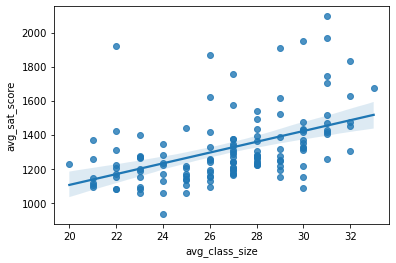

In [94]:
# Checking if the average class size has an impact towards the average SAT score.
sns.regplot(data = educc, 
            x = 'avg_class_size', 
            y = 'avg_sat_score'
           )

In [95]:
# It appears that the average class size is positively correlated to the average SAT score. It looks like as the class
# size increases, so does the average SAT score to an extent.

<AxesSubplot:xlabel='dropout_percent', ylabel='avg_sat_score'>

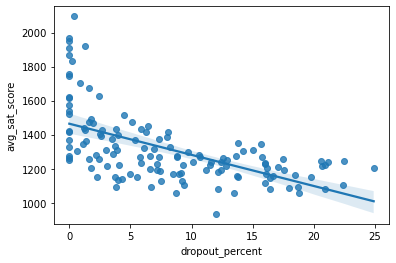

In [96]:
sns.regplot(data = educc, x = 'dropout_percent', y = 'avg_sat_score')

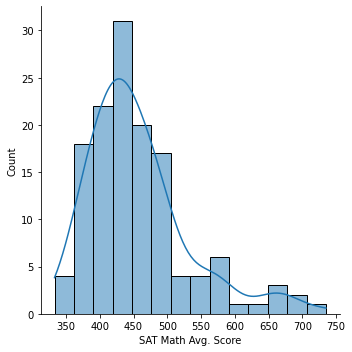

In [103]:
sns.displot(educc['SAT Math Avg. Score'], kde = True)

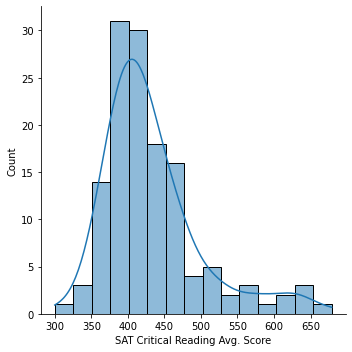

In [104]:
sns.displot(educc['SAT Critical Reading Avg. Score'], kde = True)

In [97]:
# There is a clear negative correlation between the dropout percent and the average SAT score. The higher the dropout
# percent of a certain school, it appears the average SAT score suffers as well. SAT scores is commonly correlated 
# with the school performance, therefore it can be reasonably correlated that based on the higher percentage of drop-
# out students, the lower performing the school is, and therefore the SAT score. 

In [98]:
educa = educ.drop(['exams_per_student','high_score_percent','frl_percent','total_enrollment','selfcontained_num','Total Cohort','lat','long'], axis = 1)
categorize=['boro']

L_encoder=LabelEncoder()

for label in categorize:
    educa[label]=L_encoder.fit_transform(educ[label])

Text(0.5, 1.0, 'Data Correlations')

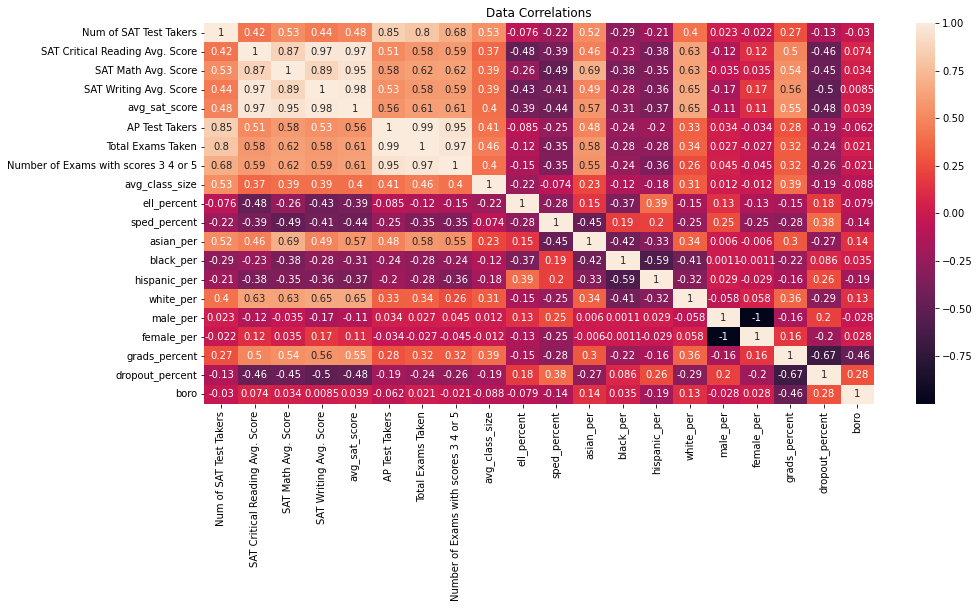

In [99]:
plt.figure(figsize=(15,7))
sns.heatmap(educa.corr(),annot=True)
plt.title('Data Correlations')

In [100]:
# Using SKlearn to convert all categorical values to numerical. Finding correlation between each value compared to 
# another. (Note: For correlation, 1 = Best POSITIVE correlation between variables, 0 = NO correlation, -1 = Best 
# NEGATIVE correlation between variables.)

# Conclusion

From the analysis, there appears to be some trends that stand out. Those include:

- The gender distribution of both male and females per school does not play a role in the average SAT score.
- It appears that there is a discrepancy between race distribution of top schools and lower tier schools in the Bronx and Manhattan. From the violin and boxplots, it really displays that the Bronx (which consists of mainly Hispanic and African Americans) score consistently lower than those living in Manhattan and Queens (Which has a large Asian and white population). 
- From the Bronx, it is notoriously known to be a dangerous and underfunded area, while in Queens and Manhattan, which are both boroughs that are well funded by the government, score way better on the SAT. 
- From the regression plots, it appears that the higher the drop-out rates per school, the lower the SAT score, which is expected.
- The average class size per schools also appear to have a positive correlation for the average SAT score for the school. 